<a href="https://colab.research.google.com/github/emerging-pc/Grip_internship/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author - Pratibha Chaurasiya
     

E-mail - pc313963@gmail.com

Linkedin - https://www.linkedin.com/in/pc-pratibha-chaurasiya/

TASK 1 - Prediction using Supervised ML
- Predict the percentage of a student based on number of study hours

Importing the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")  #reading the dataset
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.info()   #getting the info of our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe()  #getting the description of our dataset

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.isnull().sum()  #checking for any null-values, and as we can see there are no null values

Hours     0
Scores    0
dtype: int64

Visualizing the Dataset

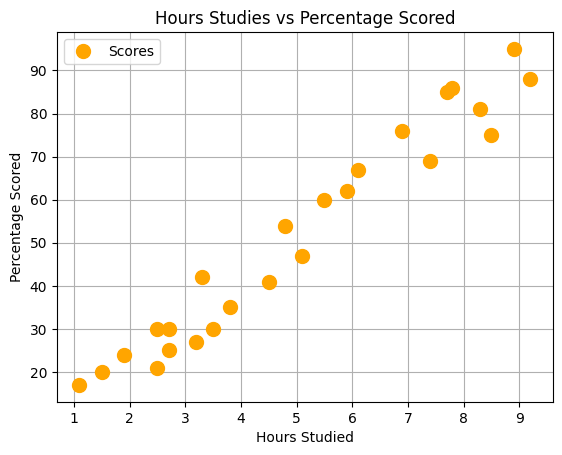

In [6]:
df.plot(x="Hours", y= "Scores", color = 'orange', style='o', markersize =10)
plt.title('Hours Studies vs Percentage Scored')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.grid()
plt.show()
plt.rcParams["figure.figsize"] = [16,10]

In [7]:
df.corr() #checking the correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [8]:
#using iloc to segregate data
X = df.iloc[:,:1].values
y = df.iloc[:, 1:].values

In [9]:
#splitting the data into testing and training data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

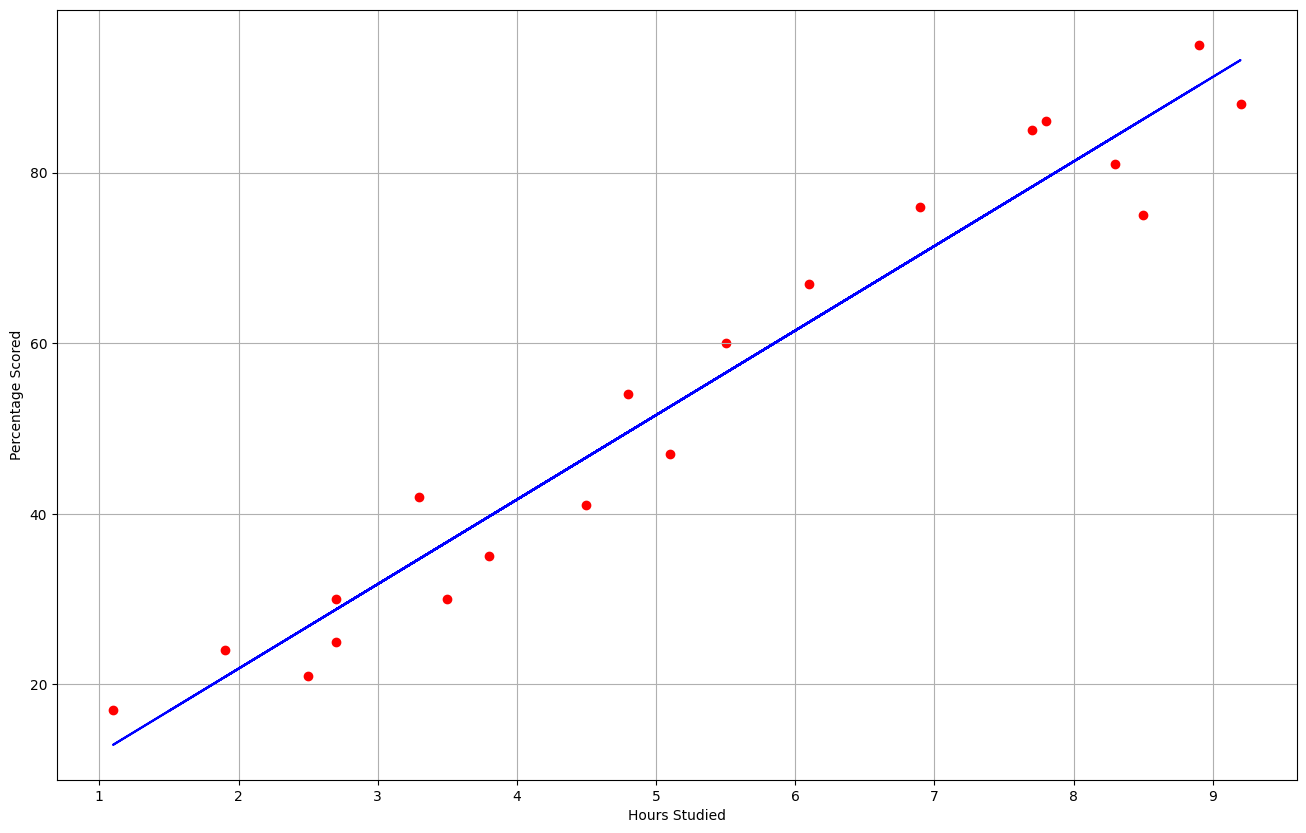

In [11]:
line = model.coef_*X + model.intercept_

# Plotting for the training data
plt.scatter(X_train, y_train, color='red')
plt.plot(X, line, color='blue');
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.grid()
plt.show()

In [12]:
print(X_test) # Testing data - In Hours
y_pred = model.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
# Comparing Actual vs Predicted
compare = pd.DataFrame({ 'Actual':[y_test],'Predicted':[y_pred] })
compare

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398023], [33.732260779489835], [..."


In [14]:
# Testing with our own data

hours = 9.25
own_pred = model.predict([[hours]])
print("Predicted score if a person studies for",hours,"hours is",own_pred[0])

Predicted score if a person studies for 9.25 hours is [93.69173249]


Evaluating the model

In [15]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
